# **Modelo de Predicción**

Vamos a probar varios de los modelos de ensamble a ver cual funciona mejor para nuestro problema de regresión:

In [12]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import pickle

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("../../../")
from src import funciones_problemas_regresion as fpr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
df =  pd.read_pickle("../../../datos/cluster_1/df_nonulls_encoded_sinout_scaled.pkl").reset_index(drop=True)
variable_respuesta = "Profit"

df.head()

,Profit,Country,Market,Category,Sub-Category,Quantity,Discount,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,355.44,0.725674,-0.875763,-1.013633,-0.182122,0.351035,-0.742232,6.167094,2.473144,-0.227586,-0.497156,-1.256059,-1.037995,1.517264,-0.466178,-0.270584,1.533191,-0.222974,-1.189654
1,161.76,0.494889,0.872073,0.986551,-0.216192,0.351035,-0.742232,6.163121,-0.404344,-0.227586,2.011442,-1.256059,0.963396,-0.659081,-0.466178,3.695705,-0.652234,-0.222974,-1.189654
2,65.70,1.241835,1.217866,-1.013633,0.523232,0.854140,-0.742232,6.049985,2.473144,-0.227586,-0.497156,-1.256059,0.963396,-0.659081,-0.466178,-0.270584,-0.652234,-0.222974,0.840580
3,280.44,1.241835,1.217866,0.986551,0.453333,0.351035,-0.742232,6.024263,-0.404344,-0.227586,2.011442,-1.256059,0.963396,-0.659081,-0.466178,-0.270584,1.533191,-0.222974,-1.189654
4,905.70,1.241835,1.217866,-1.013633,-3.277537,0.854140,-0.742232,6.007952,-0.404344,-0.227586,-0.497156,0.796141,0.963396,-0.659081,-0.466178,-0.270584,-0.652234,-0.222974,0.840580


Hemos probado a ir quitando columnas para predecir y ver si el r2 mejora, sin embargo, no hay ninguna mejora significante.

In [3]:
#df = df.drop(columns=["Ship Mode_First Class", "Ship Mode_Same Day","Ship Mode_Second Class", "Ship Mode_Standard Class", "Segment_Consumer", "Segment_Corporate", "Segment_Home Office", "Order Priority_Critical", "Order Priority_High",	"Order Priority_Low","Order Priority_Medium"])

Probaremos varios modelos de ensamble y compararemos sus métricas a ver cual es el que arroja mejores resultados.

## Random Forest Regressor

In [4]:
variable_respuesta = "Profit"
modelo = "RandomForestRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_rf = {
    'n_estimators': [50, 100, 150], #número de árboles que queremos en el bosque
    'max_depth': [15, 20, 30],
    'min_samples_split': [15, 20, 25],
    'min_samples_leaf': [15, 20, 25], 
    'max_leaf_nodes': [100, 200, 300]
}

df_metricas, modelo_random_forest_1 = clase_arbol.grid_search(params_rf, cv=3)
df_metricas

Calculando el modelo con RandomForestRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'max_depth': 15, 'max_leaf_nodes': 300, 'min_samples_leaf': 15, 'min_samples_split': 15, 'n_estimators': 150}


,r2_scores,MAE,MSE,RMSE
train,0.543428,56.171214,15406.703674,124.123743
test,0.579663,59.180472,11620.658662,107.799159


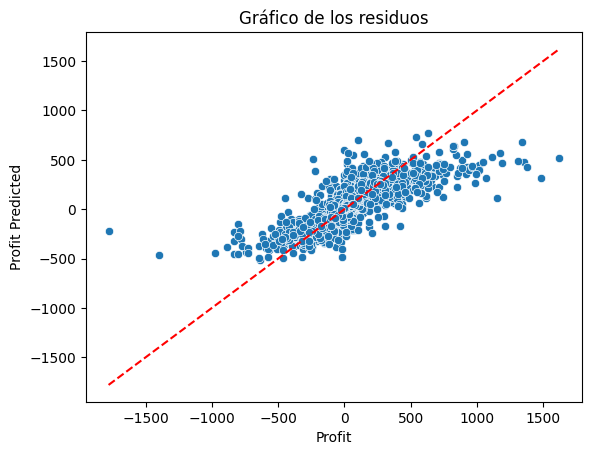

In [5]:
clase_arbol.visualizacion_residuos()

Podemos ver que dondemás se confunde es en los valores más extremos, pues es de los que menos datos tiene para aprender.

## Gradient Boosting Regressor

In [14]:
modelo = "GradientBoostingRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_rf = {
    'n_estimators': [50, 100, 150], #número de árboles que queremos en el bosque
    'max_depth': [15, 20, 30],
    'min_samples_split': [15, 20, 25],
    'min_samples_leaf': [15, 20, 25], 
    'max_leaf_nodes': [100, 200, 300]
}

df_metricas, modelo_grad_boosting_1 = clase_arbol.grid_search(params_rf, cv=3)
df_metricas

Calculando el modelo con GradientBoostingRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'max_depth': 15, 'max_leaf_nodes': 100, 'min_samples_leaf': 25, 'min_samples_split': 15, 'n_estimators': 50}


,r2_scores,MAE,MSE,RMSE
train,0.739104,47.595821,6034.465562,77.681823
test,0.574838,55.921383,9318.159917,96.530616


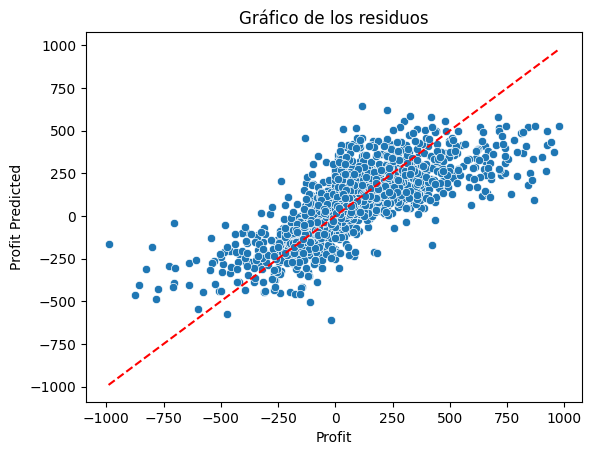

In [ ]:
clase_arbol.visualizacion_residuos()

Este modelo era el mejor en laprimera iteración, tras hacer unos ajustes en los outliers hemos conseguido que el RMSE se reduzc de 105 a 96 aunque con un poco de overfitting.

## XGBRegressor

In [16]:
modelo = "XGBRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_xgb = {
    'n_estimators': [60, 65, 70],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight':  [3, 4, 5, 6],  # Equivalente a min_samples_leaf
    'subsample': [0.8, 1.0],        # Para evitar sobreajuste
    'colsample_bytree': [0.8, 1.0]  # Selección de columnas al construir cada árbol
}

df_metricas, modelo_xgb = clase_arbol.grid_search(params_xgb, cv=5)
df_metricas

Calculando el modelo con XGBRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 65, 'subsample': 1.0}


,r2_scores,MAE,MSE,RMSE
train,0.659834,53.095608,7867.957980,88.701511
test,0.582988,55.718063,9139.552721,95.601008


Tras quitar los outliers las extremos hemos conseguido también que el XGB nos de una métricas mejores y con menor overfitting que el gradient siendo este nuestro mejor modelo, vamos a inentar ajustarle aún más los parámetros:

In [19]:
modelo = "XGBRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_xgb = {
    'n_estimators': [60, 65, 70, 75],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 5, 6, 7],
    'min_child_weight':  [3, 4, 5, 6],  # Equivalente a min_samples_leaf
    'subsample': [0.8, 1.0],        # Para evitar sobreajuste
    'colsample_bytree': [0.8, 1.0]  # Selección de columnas al construir cada árbol
}

df_metricas, modelo_xgb = clase_arbol.grid_search(params_xgb, cv=5)
df_metricas

Calculando el modelo con XGBRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 75, 'subsample': 1.0}


,r2_scores,MAE,MSE,RMSE
train,0.668730,52.511746,7662.191718,87.533946
test,0.580984,55.638622,9183.469719,95.830422


Las métricas a penas mejoran, por lo que nos quedamos con el modelo anterior.

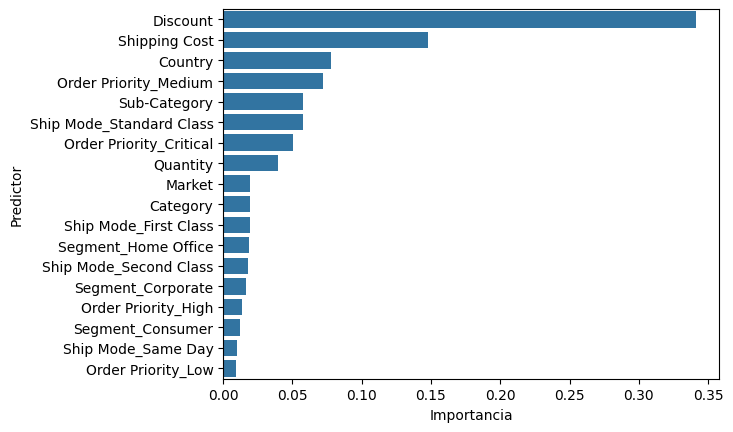

In [20]:
clase_arbol.importancias_variables()

No nos sorprende que las variables que tienen más importancia sean Discount y ship mode pues eran las más correlacionadas con la variable respuesta como se vió en el EDA.